In [2]:
# required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# I- Data Preprocessing

### 1- Loading the data 

In [4]:
# Load the Excel file
file_path = "C:\\Users\\elmou\\OneDrive\\Desktop\\bcg assignement\\Take-home-case-Data-analyst.xlsx"
sheet_name = "data"

# Read the data into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Check the data
df.head()


,id,sub_ms_class,zoning_ms,frontge_lot,area_lot,streetname,alleyname,shape_lot,contour_land,util,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,87000
1,456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
2,1324,30,RL,50.0,5330,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,82500
3,218,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Family,107000
4,1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,392500


Data Types for Each Column:
id                 int64
sub_ms_class       int64
zoning_ms         object
frontge_lot      float64
area_lot           int64
                  ...   
mosold             int64
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
Length: 81, dtype: object


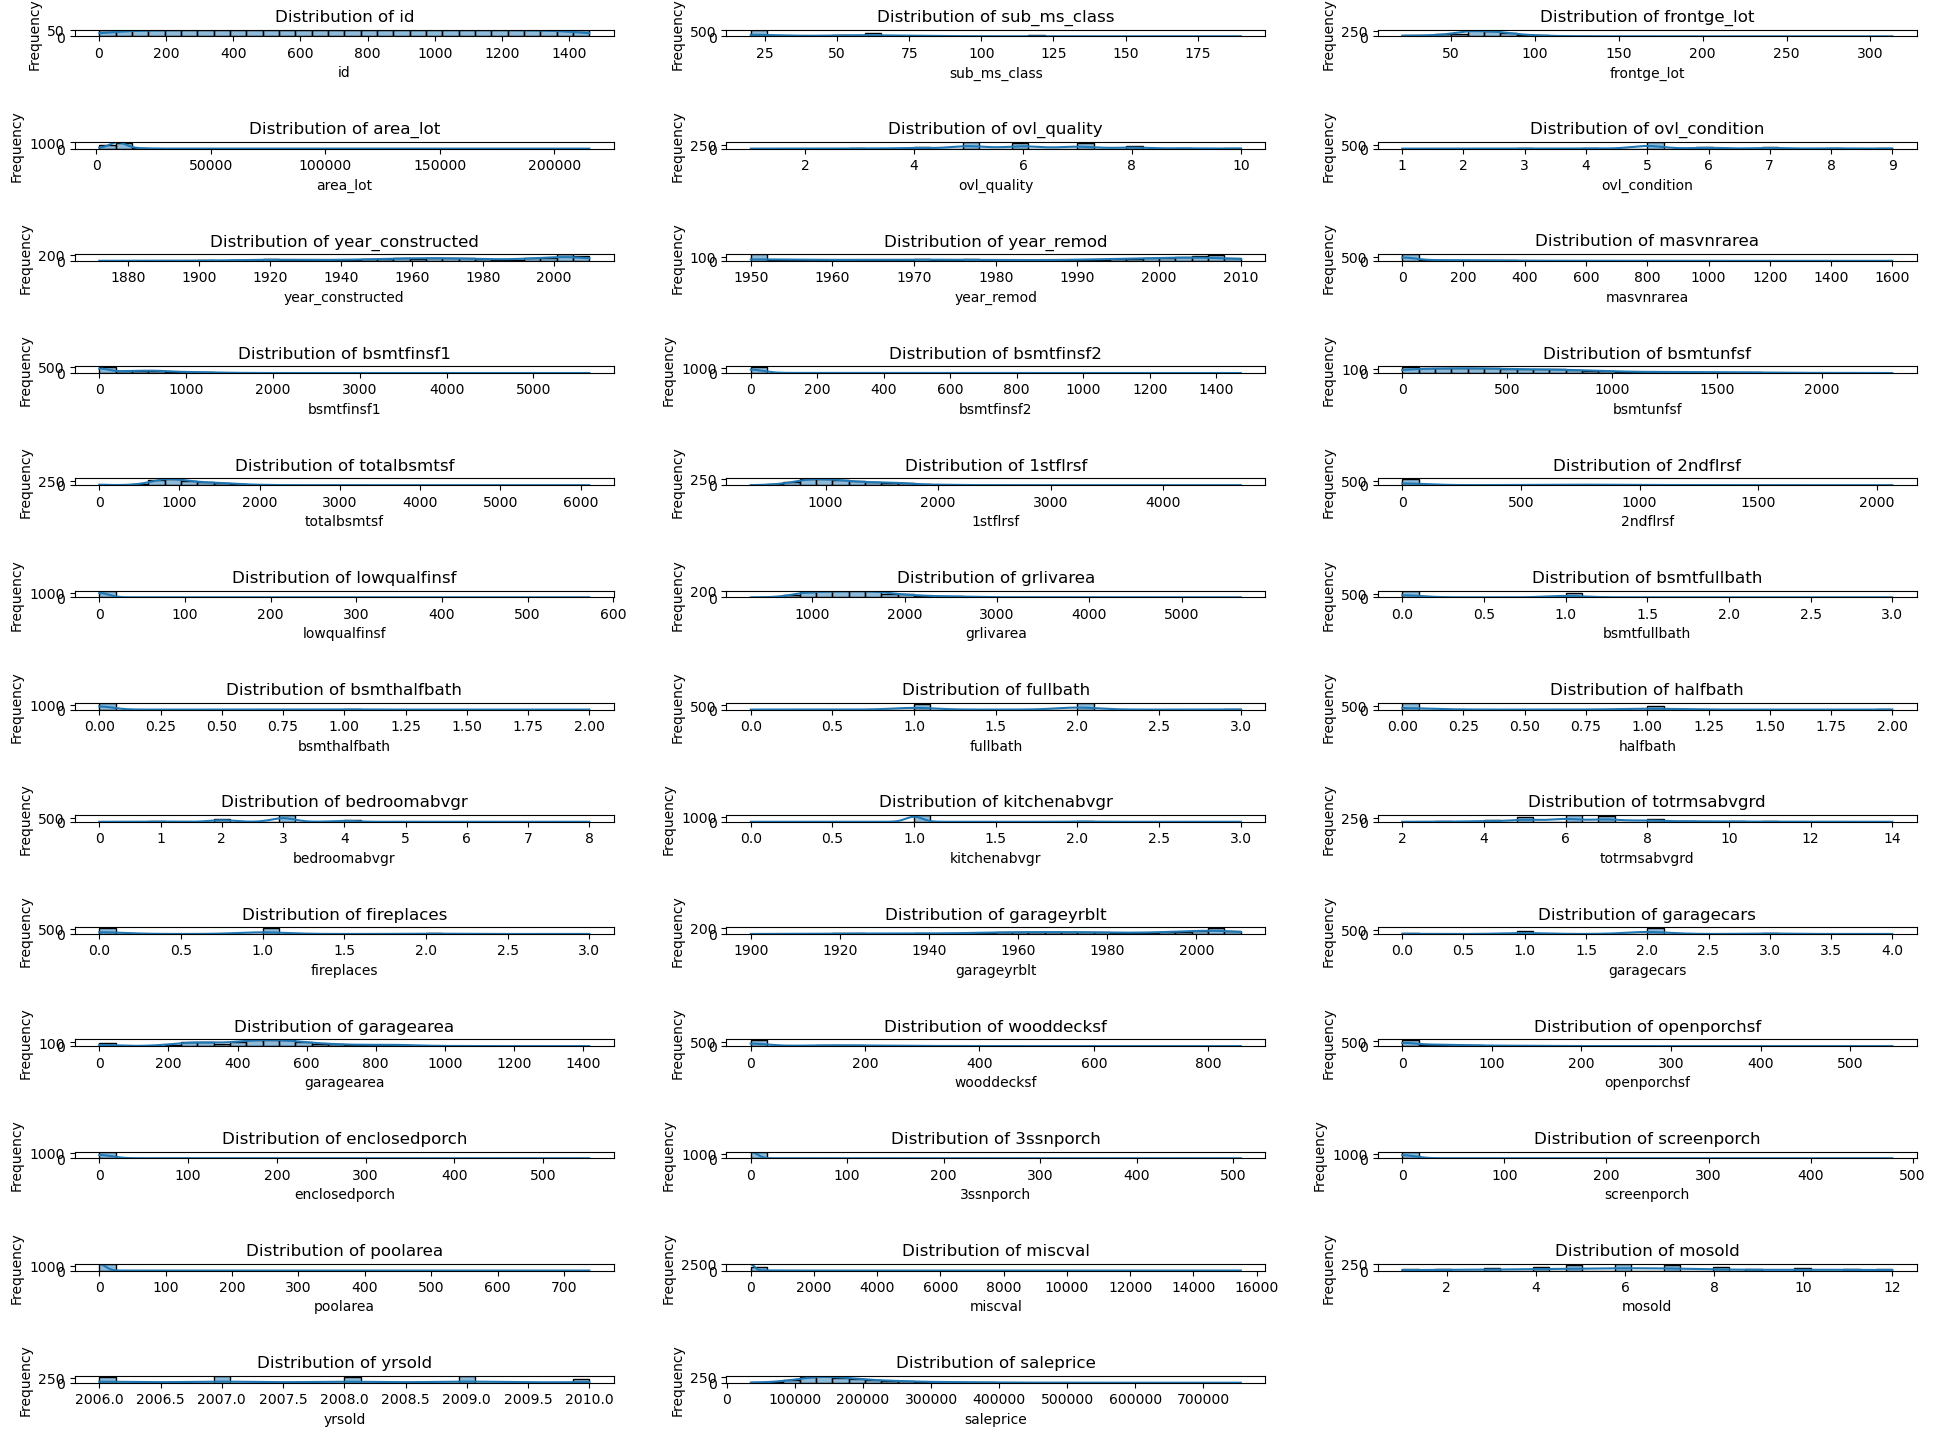

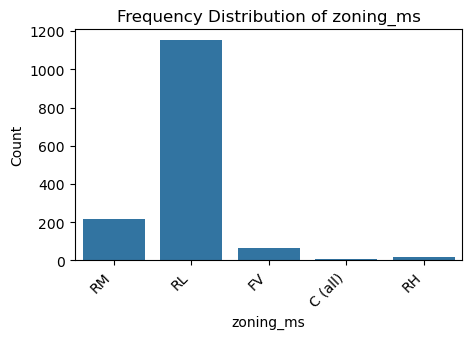

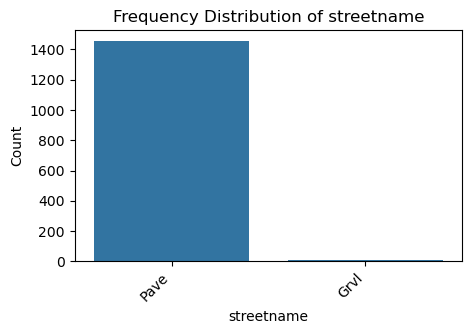

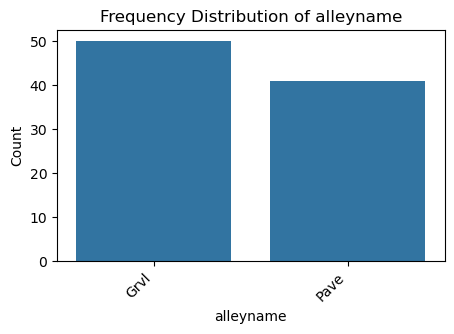

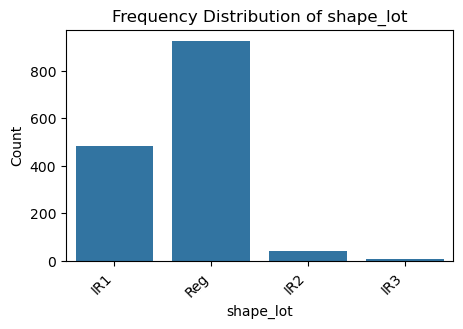

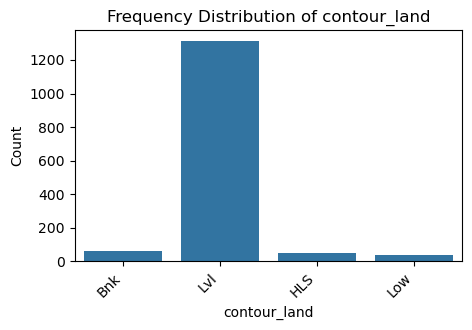

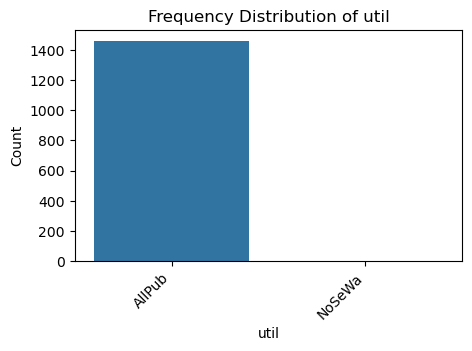

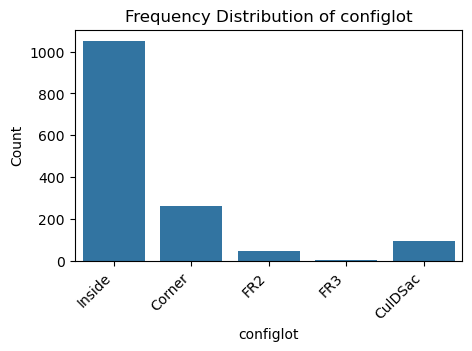

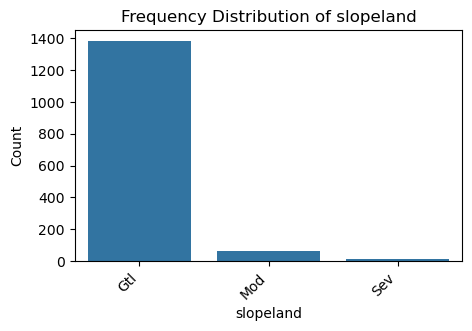

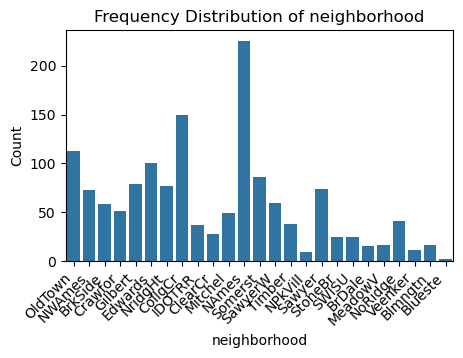

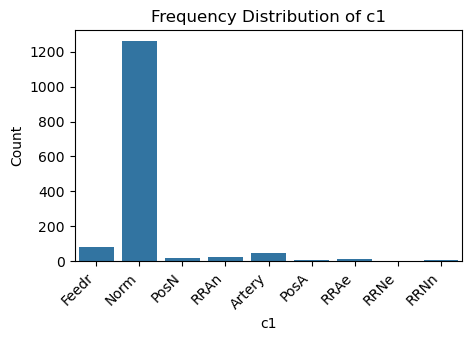

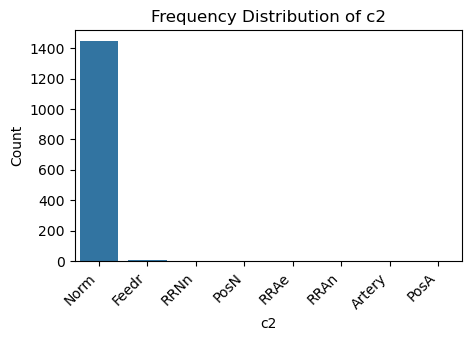

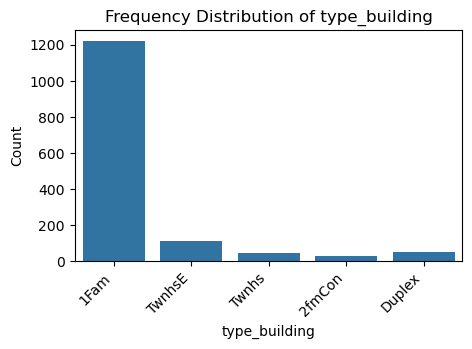

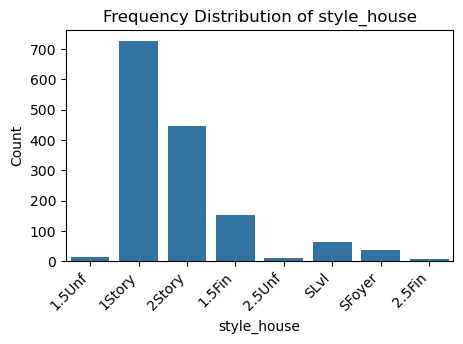

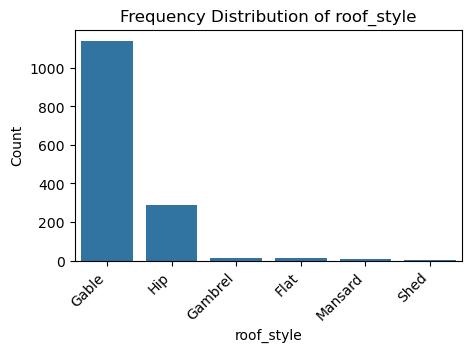

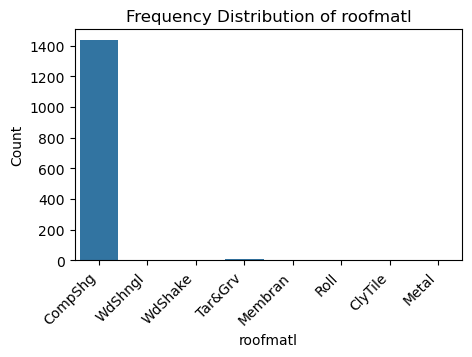

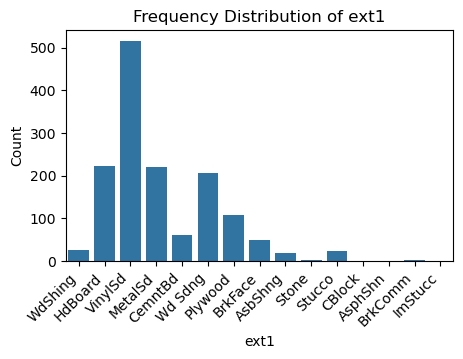

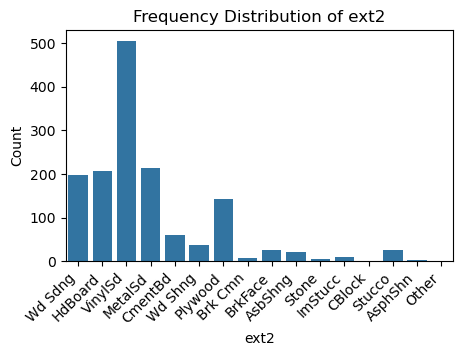

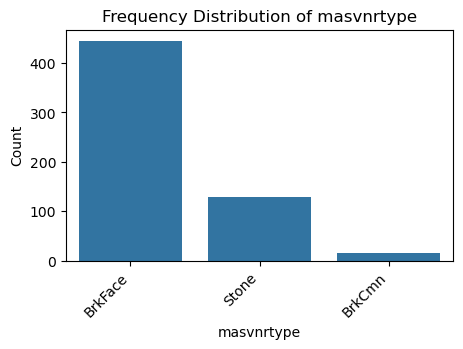

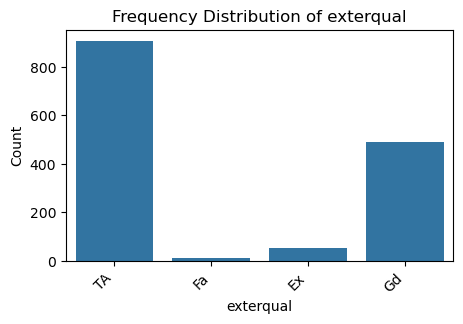

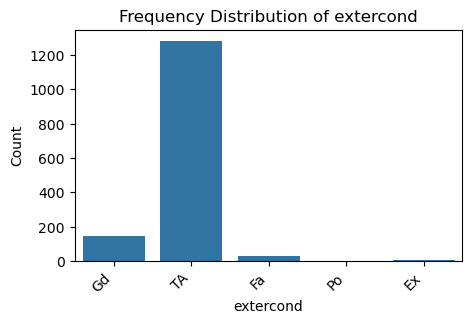

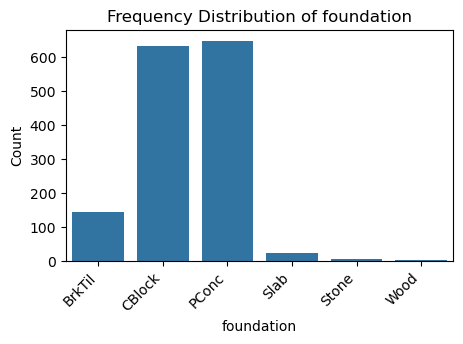

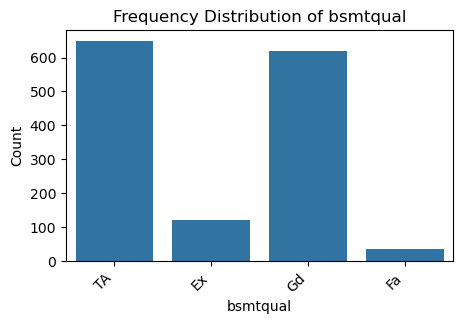

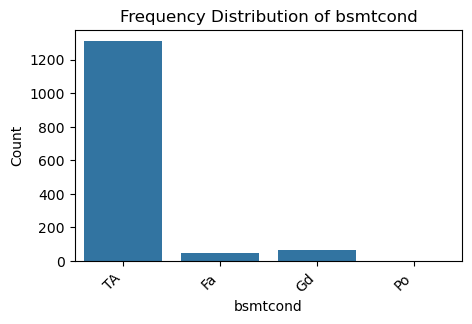

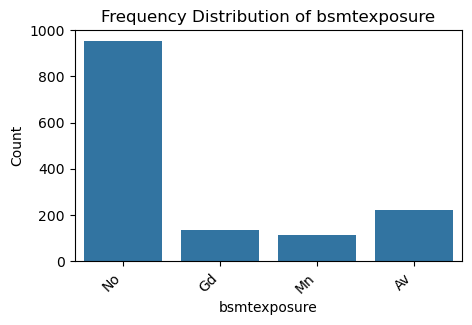

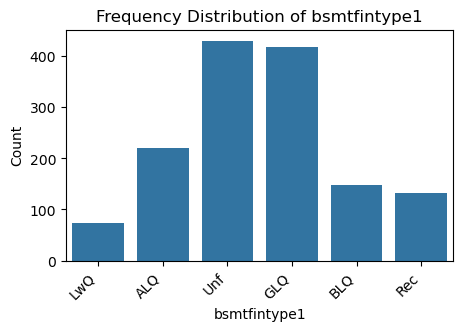

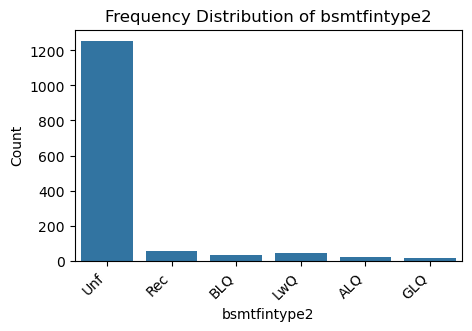

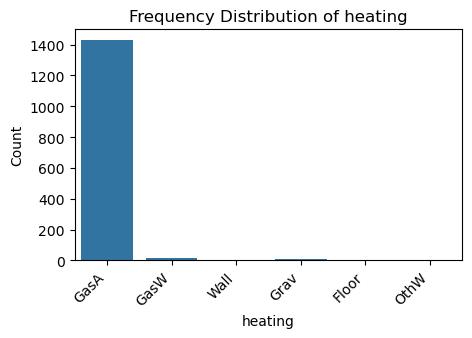

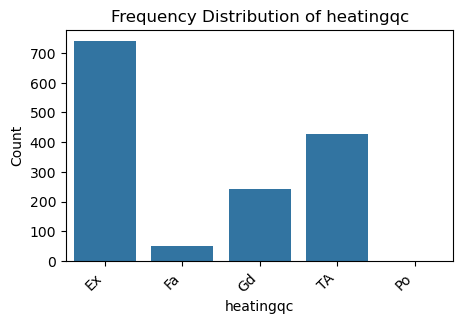

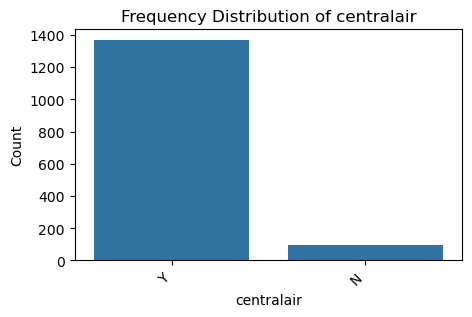

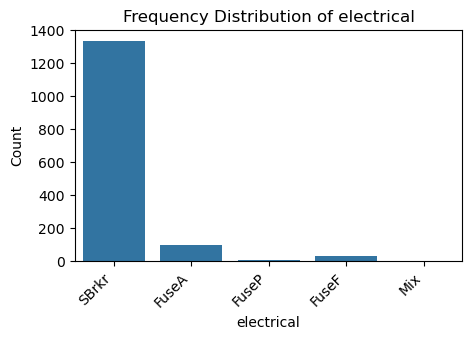

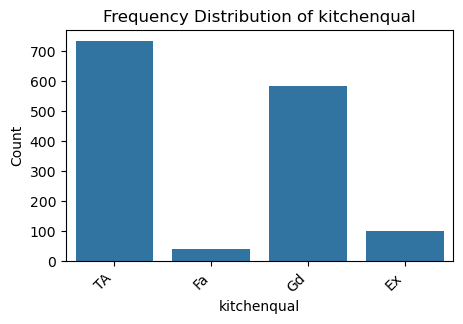

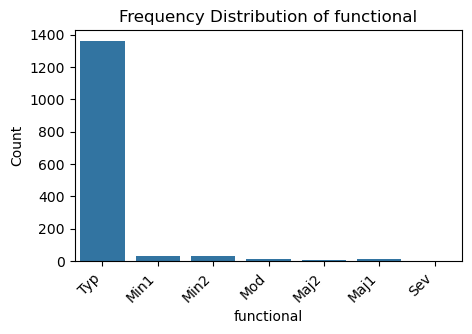

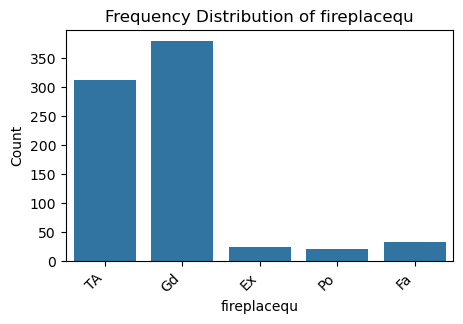

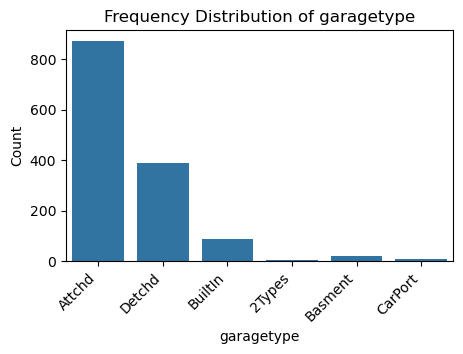

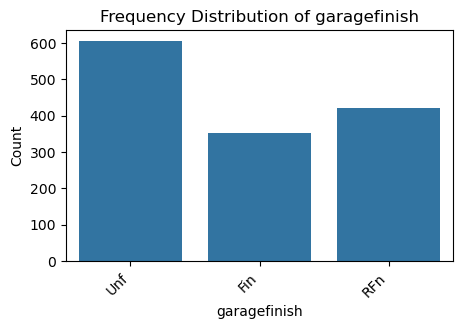

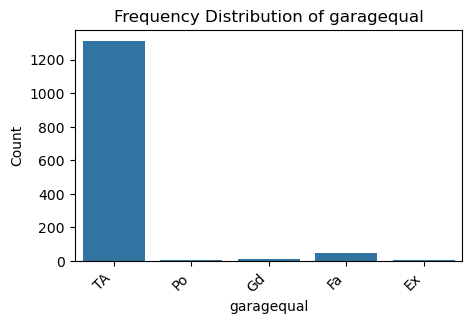

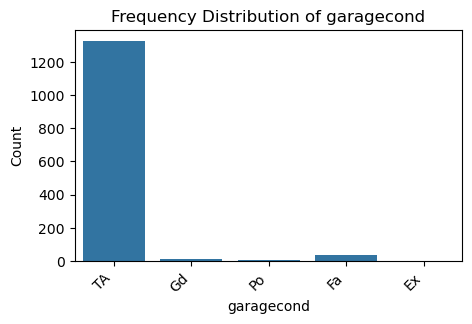

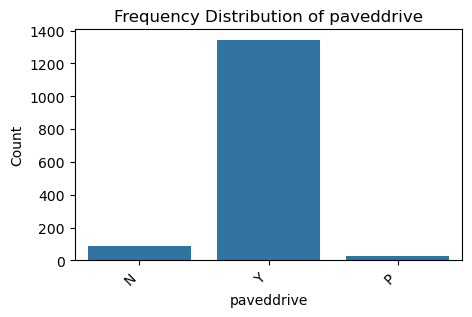

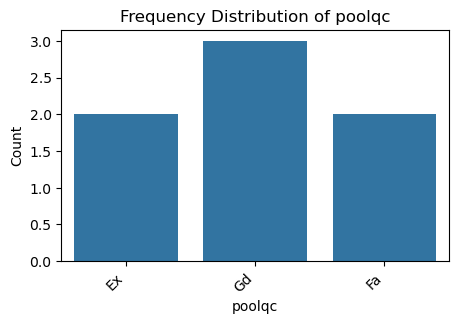

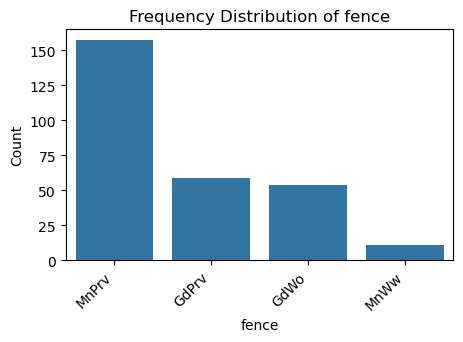

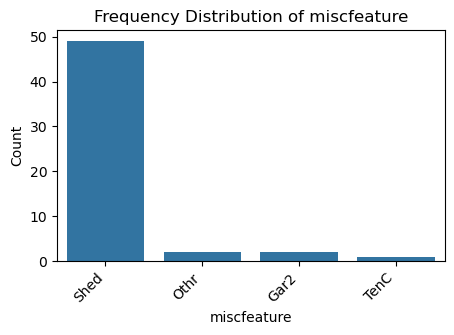

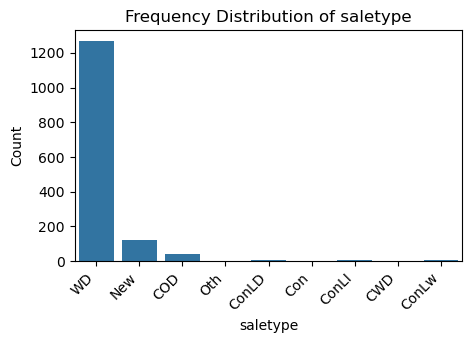

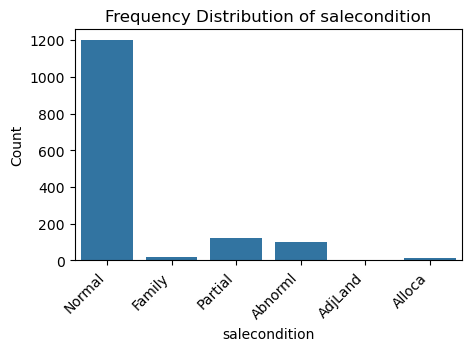

In [6]:
print("Data Types for Each Column:")
print(df.dtypes)

# Identify numeric columns and plot histograms
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))  # Larger figure for visibility
n_rows = (len(numeric_columns) + 2) // 3  # Calculate number of rows needed

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(df[column], kde=True, bins=30)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout(pad=3.0)  # Adjust layout
plt.show()

# Identify categorical columns and plot count distributions
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=column)
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-ticks
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


### 2- finding vriables with missing values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Convert to DataFrame for better display
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']

# Calculate percentage of missing values
missing_values_df['Percentage'] = (missing_values_df['Missing Values'] / len(df)) * 100

# Sort DataFrame by percentage
missing_values_df = missing_values_df.sort_values(by='Percentage', ascending=False)

missing_values_df


,Column Name,Missing Values,Percentage
16,poolqc,1453,99.520548
18,miscfeature,1406,96.301370
1,alleyname,1369,93.767123
17,fence,1179,80.753425
2,masvnrtype,872,59.726027
10,fireplacequ,690,47.260274
0,frontge_lot,259,17.739726
11,garagetype,81,5.547945
12,garageyrblt,81,5.547945
13,garagefinish,81,5.547945


For variables with missing values greater than 45%, it is preferable to delete them and treat them as if they never existed. This approach is better than imputing values, as none of these variables are truly important. Since most of them do not represent significant aspects to consider when purchasing a house, variables with over 90% missing values may indicate potential outliers

In [8]:
threshold = 0.55 * len(df)  # Threshold for missing values
df = df.dropna(thresh=threshold, axis=1)  # Drop columns with too many missing values
df = df.drop(columns=['id'])  # Remove 'id' column

df.head()


,sub_ms_class,zoning_ms,frontge_lot,area_lot,streetname,shape_lot,contour_land,util,configlot,slopeland,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,45,RM,55.0,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,87000
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2007,WD,Normal,175500
2,30,RL,50.0,5330,Pave,Reg,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2009,WD,Normal,82500
3,70,RM,57.0,9906,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,9,2006,WD,Family,107000
4,120,RM,64.0,5587,Pave,IR1,HLS,AllPub,Inside,Mod,...,0,153,0,0,0,11,2008,New,Partial,392500


In [10]:
# Check for missing values and summarize
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']

# Calculate and sort the percentage of missing values
missing_values_df['Percentage'] = (missing_values_df['Missing Values'] / len(df)) * 100
missing_values_df = missing_values_df.sort_values(by='Percentage', ascending=False)

missing_values_df  # Display results


,Column Name,Missing Values,Percentage
0,frontge_lot,259,17.739726
8,garagetype,81,5.547945
9,garageyrblt,81,5.547945
10,garagefinish,81,5.547945
11,garagequal,81,5.547945
12,garagecond,81,5.547945
4,bsmtexposure,38,2.602740
6,bsmtfintype2,38,2.602740
2,bsmtqual,37,2.534247
3,bsmtcond,37,2.534247


### 3- Correlation Analysis and Feature Reduction

In [16]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display unique values for each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


zoning_ms: ['RM' 'RL' 'FV' 'C (all)' 'RH']
streetname: ['Pave' 'Grvl']
shape_lot: ['IR1' 'Reg' 'IR2' 'IR3']
contour_land: ['Bnk' 'Lvl' 'HLS' 'Low']
util: ['AllPub' 'NoSeWa']
configlot: ['Inside' 'Corner' 'FR2' 'FR3' 'CulDSac']
slopeland: ['Gtl' 'Mod' 'Sev']
neighborhood: ['OldTown' 'NWAmes' 'BrkSide' 'Crawfor' 'Gilbert' 'Edwards' 'NridgHt'
 'CollgCr' 'IDOTRR' 'ClearCr' 'Mitchel' 'NAmes' 'Somerst' 'SawyerW'
 'Timber' 'NPkVill' 'Sawyer' 'StoneBr' 'SWISU' 'BrDale' 'MeadowV'
 'NoRidge' 'Veenker' 'Blmngtn' 'Blueste']
c1: ['Feedr' 'Norm' 'PosN' 'RRAn' 'Artery' 'PosA' 'RRAe' 'RRNe' 'RRNn']
c2: ['Norm' 'Feedr' 'RRNn' 'PosN' 'RRAe' 'RRAn' 'Artery' 'PosA']
type_building: ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
style_house: ['1.5Unf' '1Story' '2Story' '1.5Fin' '2.5Unf' 'SLvl' 'SFoyer' '2.5Fin']
roof_style: ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
roofmatl: ['CompShg' 'WdShngl' 'WdShake' 'Tar&Grv' 'Membran' 'Roll' 'ClyTile'
 'Metal']
ext1: ['WdShing' 'HdBoard' 'VinylSd' 'MetalSd' 'Cem

In [20]:
df_encoded = df.copy()

# nominal and ordinal variables
nominal_vars = ['zoning_ms', 'streetname', 'shape_lot', 'contour_land', 'util', 
                'configlot', 'slopeland', 'neighborhood', 'c1', 'c2', 'type_building', 
                'style_house', 'roof_style', 'roofmatl', 'ext1', 'ext2', 'centralair', 
                'paveddrive', 'saletype', 'salecondition', 'foundation', 'heating', 
                'garagetype', 'electrical']

ordinal_vars = ['exterqual', 'extercond', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 
                'bsmtfintype1', 'bsmtfintype2', 'heatingqc', 'kitchenqual', 
                'garagequal', 'garagecond', 'garagefinish', 'functional']

# Encode ordinal variables
le = LabelEncoder()
for col in ordinal_vars:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode nominal variables
df_encoded = pd.get_dummies(df_encoded, columns=nominal_vars, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()


,sub_ms_class,frontge_lot,area_lot,ovl_quality,ovl_condition,year_constructed,year_remod,masvnrarea,exterqual,extercond,...,heating_Wall,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr
0,45,55.0,4388,5,7,1930,1950,0.0,3,2,...,False,False,False,False,False,False,False,False,False,True
1,20,80.0,9600,7,6,1973,1973,320.0,3,4,...,False,True,False,False,False,False,False,False,False,True
2,30,50.0,5330,4,7,1940,1950,0.0,1,4,...,False,False,False,False,False,False,False,False,False,True
3,70,57.0,9906,4,4,1925,1950,0.0,3,4,...,False,False,False,False,False,True,False,False,False,True
4,120,64.0,5587,8,5,2008,2008,186.0,0,4,...,False,True,False,False,False,False,False,False,False,True


Text(0.5, 1.0, 'Top 10 Correlated Features with saleprice')

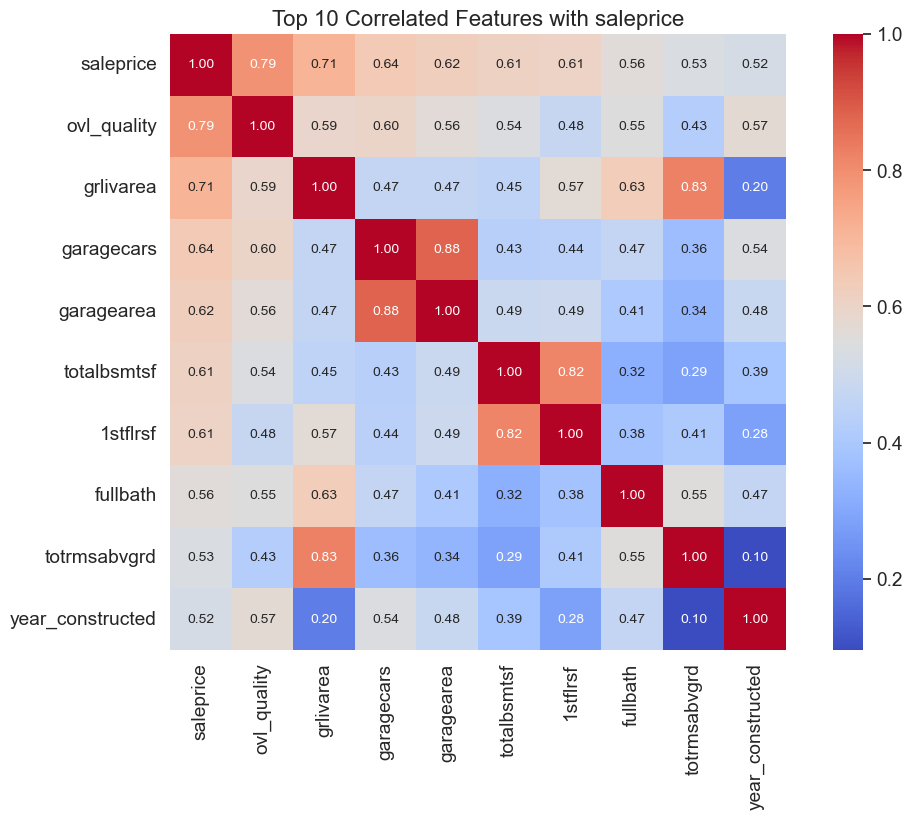

In [26]:
corrmat = df_encoded.corr()

# Specify the target variable
target_variable = 'saleprice'


k = 10
cols = corrmat.nlargest(k, target_variable)[target_variable].index

# Calculate the correlation matrix for these top 'k' variables
cm = np.corrcoef(df_encoded[cols].values.T)

# Set up the seaborn font and plot size
sns.set(font_scale=1.25)
plt.figure(figsize=(12, 8))

# Create a heatmap
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values, 
                 cmap='coolwarm')


plt.title(f'Top {k} Correlated Features with {target_variable}', fontsize=16)


#### Interpretation of Most Correlated Variables

1. **Strong Correlation with `SalePrice`**:
   - **`OverallQual`**, **`GrLivArea`**, and **`TotalBsmtSF`** are strongly correlated with **`SalePrice`**, indicating that these variables are key drivers of the property’s sale price.

2. **Garage Features**:
   - **`GarageCars`** and **`GarageArea`** are also strongly correlated (correlation ≈ 0.88). This is logical, as both variables provide similar information about garage capacity. 
   - **Decision**: We will keep **`GarageCars`**, as it has a higher correlation with **`SalePrice`** compared to **`GarageArea`**.

3. **Basement and First Floor Area**:
   - **`TotalBsmtSF`** and **`1stFlrSF`** are also highly correlated (correlation ≈ 0.82). Both measure area-related features of the house.
   - **Decision**: We will keep **`TotalBsmtSF`**, as it shows a higher correlation with **`SalePrice`**.

4. **Total Rooms and Living Area**:
   - **`TotRmsAbvGrd`** and **`GrLivArea`** are another highly related pair. Since **`GrLivArea`** represents the total living area, it covers the same information more comprehensively.
   - **Decision**: We will keep **`GrLivArea`** due to its stronger correlation with **`SalePrice`**.
**'SalePrice'**.


### 4- Scatter Plots Analysis

In this section, we will create scatter plots to analyze the relationships between the target variable `SalePrice` and several features from the dataset. Scatter plots are useful for visualizing the correlation and distribution of data points.

C:\Users\elmou\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


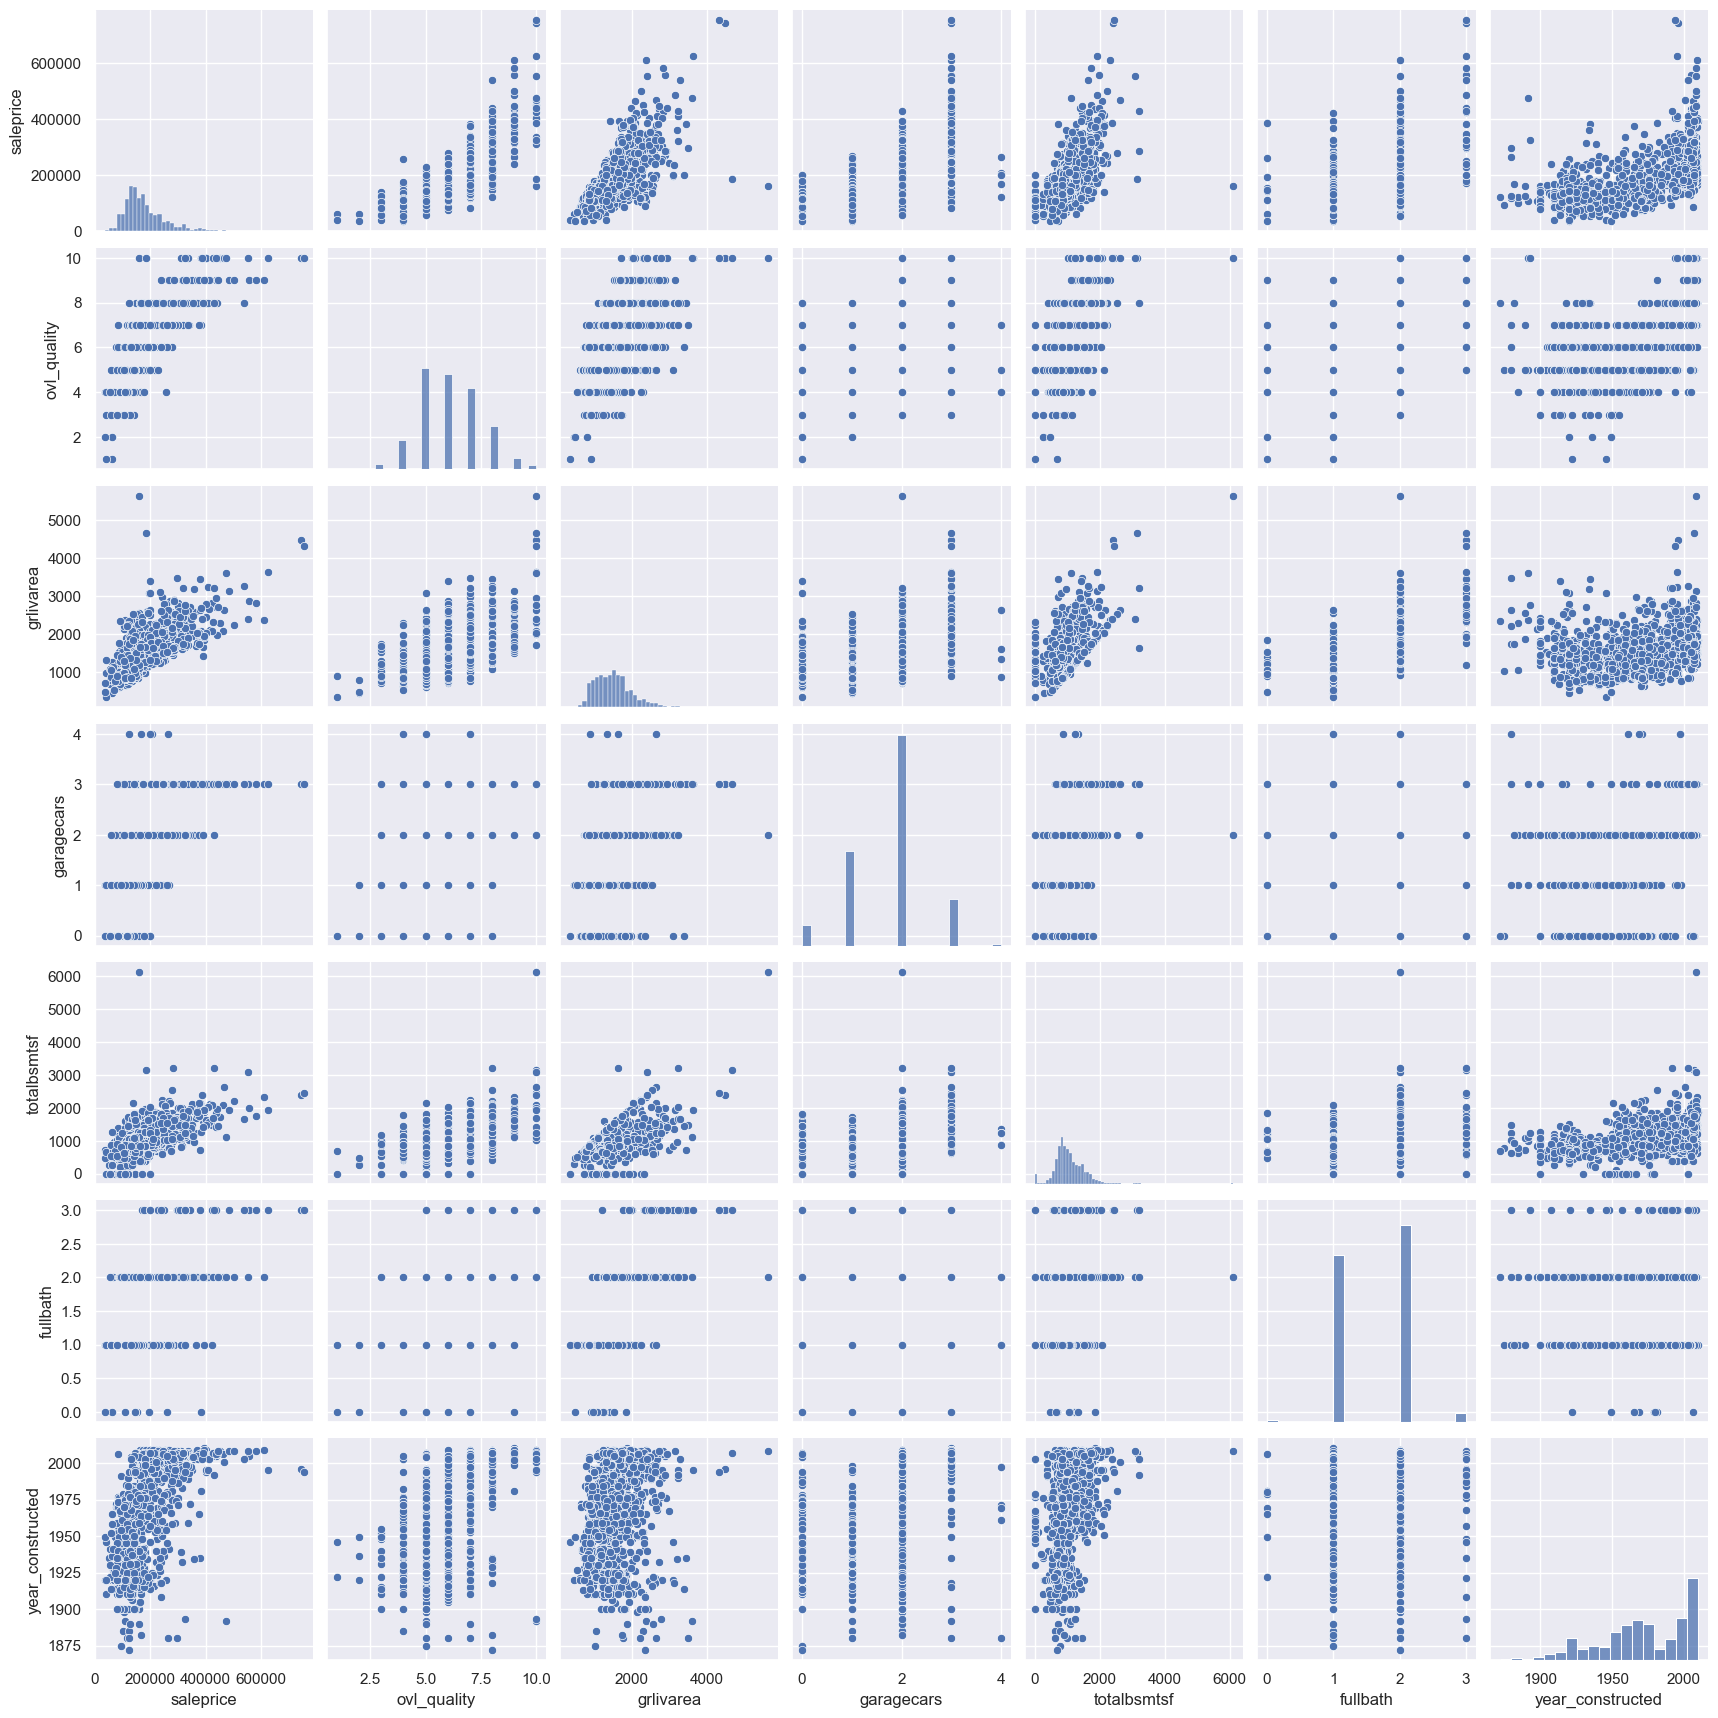

In [22]:
sns.set()
cols = ['saleprice', 'ovl_quality', 'grlivarea', 'garagecars', 'totalbsmtsf', 'fullbath', 'year_constructed']
sns.pairplot(df_encoded[cols], size = 2.5)
plt.show()

#### Insights from Scatter Plots

The scatter plots provide additional insights beyond our initial understanding of the data:

- **TotalBsmtSF vs. GrLivArea**:  
  One notable observation from this plot is the linear pattern formed by the data points. This creates a distinct boundary where most points are concentrated below the line. It is logical that the basement area (`TotalBsmtSF`) would not exceed the above-ground living area (`GrLivArea`). While it is possible for the two areas to be equal, it is quite uncommon for the basement area to surpass the living area above ground.

- **SalePrice vs. YearBuilt**:  
  The relationship between `SalePrice` and `YearBuilt` is intriguing. At the lower end of the scatter plot, there appears to be a subtle exponential trend, suggesting that older houses may have lower sale prices. Conversely, this trend can also be observed in the upper limit of the cloud of dots, indicating that more recent builds tend to command higher prices. Notably, the points corresponding to the most recent years are positioned above this upper trend line, highlighting the accelerating increase in property prices in the current market.


### 5- Missing data


Returning to the issue of missing values, before addressing them, we should analyze whether they exhibit a pattern or are random. Identifying a pattern in the missing data can guide us in filling in these gaps more effectively. Conversely, if the missing values appear to be random, our decisions regarding how to handle them could significantly impact the integrity of our dataset.
#
### Applying Findings from the Correlation Study

Based on our previous correlation analysis, we identified some highly correlated variables that provide redundant information. Therefore, to simplify the dataset and reduce multicollinearity, we will drop the following columns:

- **'GarageArea'**: We will keep **'GarageCars'** as it showed a higher correlation with **'SalePrice'**.
- **'1stFlrSF'**: We decided to retain **'TotalBsmtSF'** since it better captures the total living area.
- **'TotRmsAbvGrd'**: We will keep **'GrLivArea'** for representing living space more comprehensively.

This step will help to maintain a more concise dataset while preserving key information for analysis.


In [23]:
cols_to_drop = ['garagearea', '1stflrsf', 'totrmsabvgrd']
df = df.drop(columns=cols_to_drop)

#### Let's review the updated list of features and their missing values

In [26]:
# Check for missing values and create a summary DataFrame
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']

# Calculate and sort percentage of missing values
missing_values_df['Percentage'] = (missing_values_df['Missing Values'] / len(df)) * 100
missing_values_df = missing_values_df.sort_values(by='Percentage', ascending=False)

# Display the DataFrame
missing_values_df


,Column Name,Missing Values,Percentage
0,frontge_lot,259,17.739726
8,garagetype,81,5.547945
9,garageyrblt,81,5.547945
10,garagefinish,81,5.547945
11,garagequal,81,5.547945
12,garagecond,81,5.547945
4,bsmtexposure,38,2.602740
6,bsmtfintype2,38,2.602740
2,bsmtqual,37,2.534247
3,bsmtcond,37,2.534247


- **Frontge_Lot**: Given that the `frontge_lot` column has approximately 17% missing data and is not critical for our analysis, we will remove this column from the dataset.

- **Electrical**: We have just one missing observation in `'electrical'`. Since it's only one, we will remove this single observation and keep the variable.

- **GarageX Variables**: The `'GarageX'` variables have the same number of missing entries, likely referring to the same set of observations. Given that these missing values constitute only about 5%, we will not spend excessive time delving into them. Considering that the most critical information about garages is captured by `'GarageCars'`, and the missing values are not substantial, we'll remove these `'GarageX'` variables.

- **BsmtX Variables**: A similar rationale applies to the `'BsmtX'` variables. We'll remove these variables as well.

- **MasVnrArea**: For `'masvnrarea'`, we will fill in the missing values with `0`, assuming that a missing entry indicates no masonry veneer area.area.


In [439]:
#correlation_test = df_encoded[['masvnrarea', 'year_constructed', 'saleprice']].corr()
#correlation_subset = correlation_test.loc[['masvnrarea', 'year_constructed'], ['year_constructed', 'saleprice']]

#correlation_subset

In [28]:
# Dropping columns with missing data as per the analysis
columns_to_drop = ['garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 
                   'garagecond', 'bsmtexposure', 'bsmtfintype2', 'bsmtqual', 
                   'bsmtcond', 'bsmtfintype1','frontge_lot']


df.drop(columns=columns_to_drop, inplace=True)

# Dropping the single missing value in 'electrical'
df.dropna(subset=['electrical'], inplace=True)

# Filling missing values in 'masvnrarea' with 0 using .loc
df.loc[:, 'masvnrarea'] = df['masvnrarea'].fillna(0)


#### Final Check for Remaining Missing Values


In [30]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']

missing_values_df['Percentage'] = (missing_values_df['Missing Values'] / len(df)) * 100

missing_values_df = missing_values_df.sort_values(by='Percentage', ascending=False)

missing_values_df

,Column Name,Missing Values,Percentage


### 6 Identifying Outliers

Now that we have resolved the missing values, we will look for outliers in our dataset. 

First, we need to define a threshold to identify an observation as an outlier. We will standardize the data (mean = 0, standard deviation = 1) for the `SalePrice` variable. Then, we will visualize the lower and upper ranges to see how `SalePrice` looks.

The general approach will include the following steps:
1. Standardize the `SalePrice` data.
2. Define the outlier thr
3. Print the lower and upper outer ranges of the distribution.e4holds.
3. Visualize the distribution of `SalePrice`.

Let's proceed with the implementation.



Outer range (low) of the distribution:
[-1.83820775 -1.83303414 -1.80044422 -1.78282123 -1.77400974 -1.62295562
 -1.6166617  -1.58519209 -1.58519209 -1.57269236]

Outer range (high) of the distribution:
[3.82758058 4.0395221  4.49473628 4.70872962 4.728631   5.06034585
 5.42191907 5.58987866 7.10041987 7.22629831]


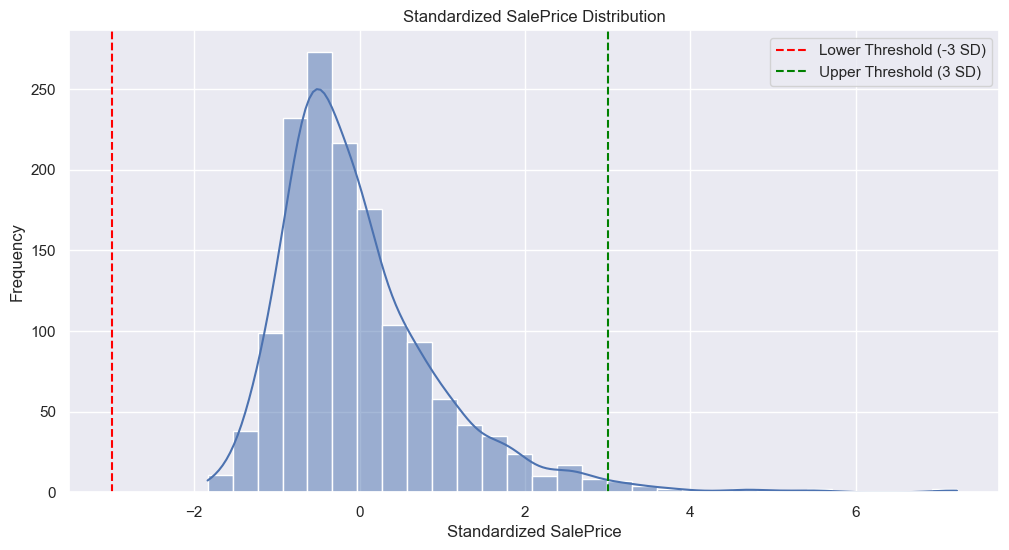

In [32]:
scaler = StandardScaler()

saleprice_scaled = scaler.fit_transform(df[['saleprice']])
lower_threshold = -3  # 3 standard deviations below the mean
upper_threshold = 3    # 3 standard deviations above the mean

low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

print("Outer range (low) of the distribution:")
print(low_range.flatten())  # Print first 10 values of the lower range

print("\nOuter range (high) of the distribution:")
print(high_range.flatten()) 


plt.figure(figsize=(12, 6))
sns.histplot(saleprice_scaled, bins=30, kde=True)
plt.axvline(lower_threshold, color='red', linestyle='--', label='Lower Threshold (-3 SD)')
plt.axvline(upper_threshold, color='green', linestyle='--', label='Upper Threshold (3 SD)')
plt.title('Standardized SalePrice Distribution')
plt.xlabel('Standardized SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Analyzing Outliers in SalePrice

Now that we have identified the outlier values in the `SalePrice`, particularly those above 7 in the standardized scale, we will further investigate these observations. 

To do this, we will create scatter plots to visualize the relationships between `SalePrice` and three different variables:
1. `Overall Quality` (`ovl_quality`)
2. `Ground Living Area` (`grlivarea`)
3. `Total Basement Area` (`totalbsm`)

This analysis will help us determine if the high `SalePrice` values are reasonable given the other attributes.

Let's proceed with the scatter plots.


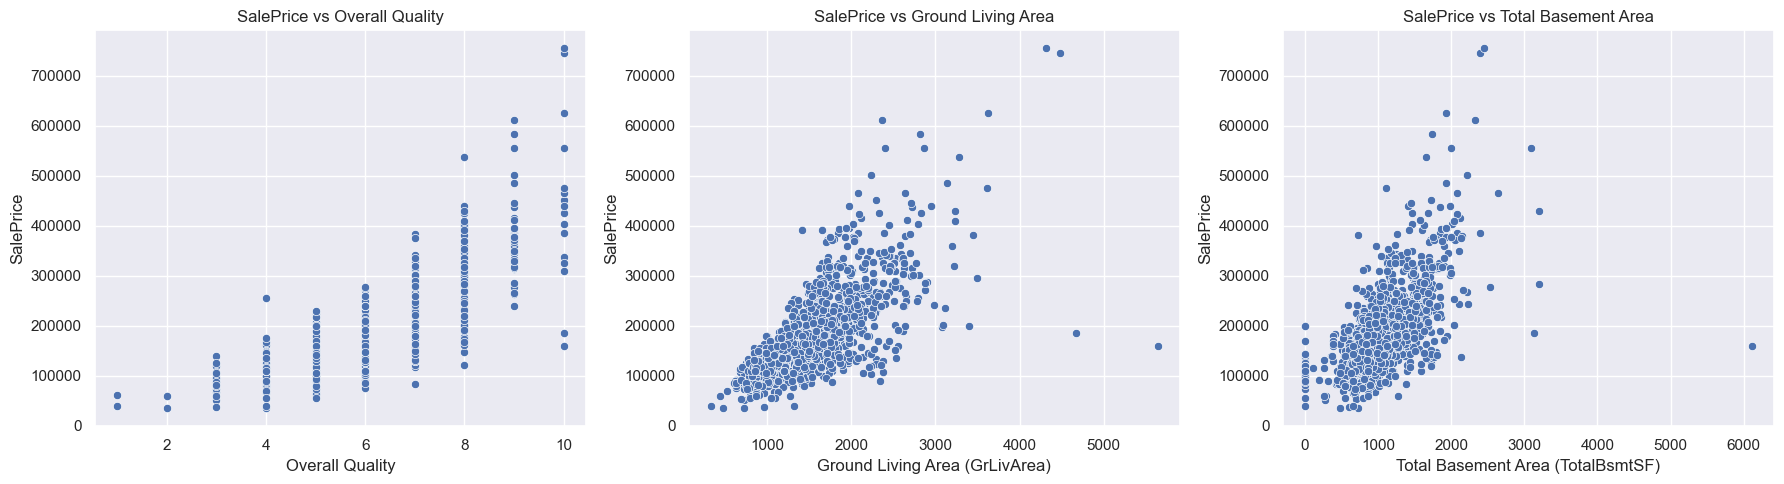

In [34]:
#Create scatter plots for saleprice against key features
plt.figure(figsize=(18, 5))

# Scatter plot for saleprice vs Overall Quality
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['ovl_quality'], y=df['saleprice'])
plt.title('SalePrice vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')

# Scatter plot for saleprice vs GrLivArea
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['grlivarea'], y=df['saleprice'])
plt.title('SalePrice vs Ground Living Area')
plt.xlabel('Ground Living Area (GrLivArea)')
plt.ylabel('SalePrice')

# Scatter plot for saleprice vs Total Basement Area
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['totalbsmtsf'], y=df['saleprice'])
plt.title('SalePrice vs Total Basement Area')
plt.xlabel('Total Basement Area (TotalBsmtSF)')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


### Outlier Analysis Results

Upon examining the scatter plots, we made several observations regarding the data points:

1. **Ground Living Area** (`GrLivArea`):
   - The two values with the largest `GrLivArea` appear to be outliers. They significantly deviate from the majority of the data points and do not align with the overall trend. 
   - One possible explanation for this discrepancy is that these values may correspond to agricultural areas, which could account for their relatively low sale prices. Given that these points do not represent typical cases, we will classify them as outliers and proceed to remove them from our dataset.

2. **Sale Price Observations**:
   - The two observations at the top of the plot, which correspond to the highest `saleprice` values (around 7.something), do not appear to be outliers in the same sense. While they are notably high, they seem to follow the established trend of the data.
   - Therefore, we will retain these two observations in our dataset, as they may represent valid, high-value properties.

In summary, we will remove the two outlier observations related to `GrLivArea` while keeping the high sale price values.

In [36]:
# Identify outliers based on GrLivArea and SalePrice
outlier_condition = (df['grlivarea'] > 4000) & (df['saleprice'] < 200000)
outliers = df[outlier_condition]

print("Identified Outliers:")
print(outliers)


Identified Outliers:
     sub_ms_class zoning_ms  area_lot streetname shape_lot contour_land  \
491            60        RL     63887       Pave       IR3          Bnk   
558            60        RL     40094       Pave       IR1          Bnk   

       util configlot slopeland neighborhood  ... enclosedporch 3ssnporch  \
491  AllPub    Corner       Gtl      Edwards  ...             0         0   
558  AllPub    Inside       Gtl      Edwards  ...             0         0   

    screenporch poolarea  miscval  mosold  yrsold  saletype salecondition  \
491           0      480        0       1    2008       New       Partial   
558           0        0        0      10    2007       New       Partial   

    saleprice  
491    160000  
558    184750  

[2 rows x 60 columns]


In [38]:
# Now, remove we the outliers
df = df[~outlier_condition]

# II - Regression

#### 1. Assumptions of Regression

Before proceeding with regression analysis, it is essential to verify that the following assumptions are met:

1. **Normality**:
   - The residuals (errors) of the regression model should be normally distributed. This can be assessed using graphical methods (such as Q-Q plots) and statistical tests (like the Shapiro-Wilk test).

2. **Homoscedasticity**:
   - The variance of the residuals should be constant across all levels of the independent variables. This can be evaluated by plotting residuals against fitted values and looking for any patterns.

3. **Linearity**:
   - There should be a linear relationship between the independent variables and the dependent variable. This can be examined using scatter plots and correlation coefficients.

4. **Absence of Correlated Errors**:
   - The residuals should be independent of one another. This assumption can be checked using the Durbin-Watson test or by inspecting residual plots.


#### Study of Linearity for SalePrice


C:\Users\elmou\AppData\Local\Temp\ipykernel_7076\308076736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['saleprice'], fit=norm)


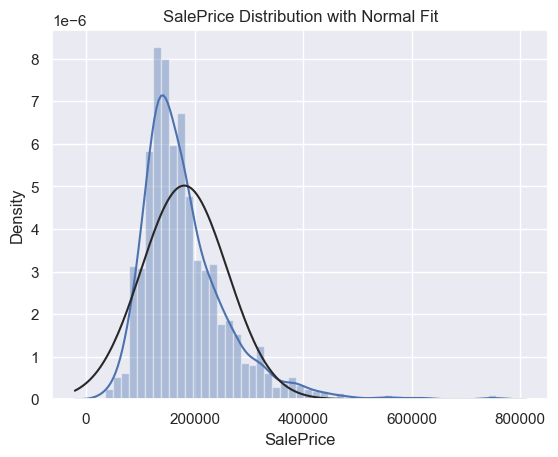

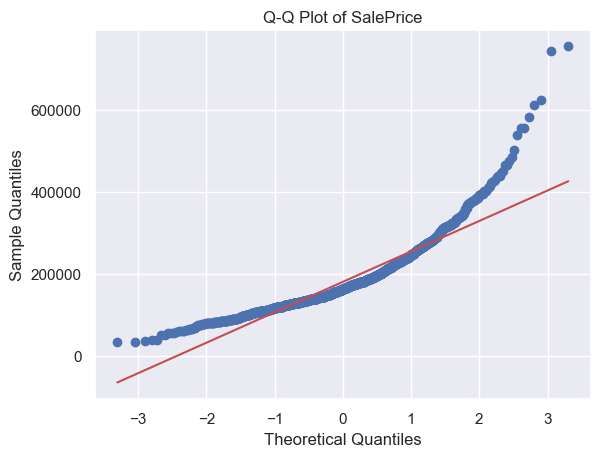

In [42]:
sns.distplot(df['saleprice'], fit=norm)
plt.title('SalePrice Distribution with Normal Fit')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()

# Q-Q plot for SalePrice
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.title('Q-Q Plot of SalePrice')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#### Remark on SalePrice Normality

The distribution of `'SalePrice'` is not normal. It exhibits **peakedness** and **positive skewness**, and does not align with the diagonal line in the Q-Q plot.


In cases of positive skewness, log transformations often work well to normalize the data. To apply this transformation, we will take the natural logarithm of the `'SalePrice'` variable as follows:

In [44]:
df['saleprice'] = np.log(df['saleprice'])

C:\Users\elmou\AppData\Local\Temp\ipykernel_7076\2379746249.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['saleprice'], fit=norm)


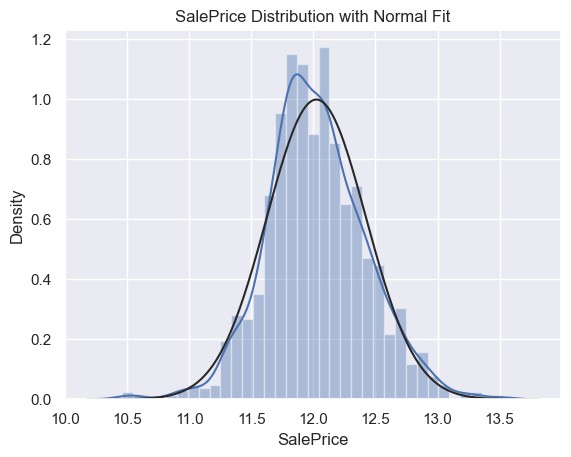

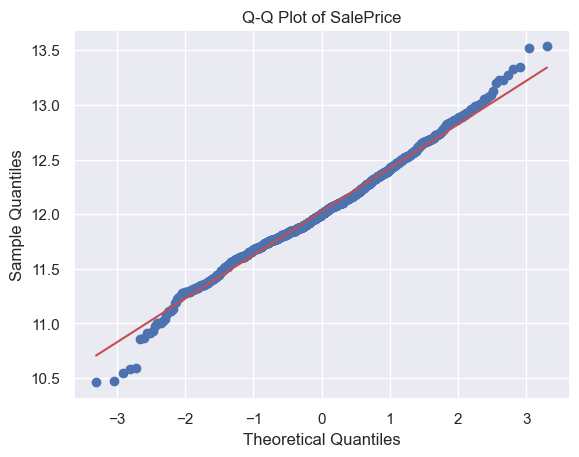

In [46]:
sns.distplot(df['saleprice'], fit=norm)
plt.title('SalePrice Distribution with Normal Fit')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()

# Q-Q plot for SalePrice
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.title('Q-Q Plot of SalePrice')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


#### Study of Linearity for GrLivArea


C:\Users\elmou\AppData\Local\Temp\ipykernel_7076\3827227883.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['grlivarea'], fit=norm)


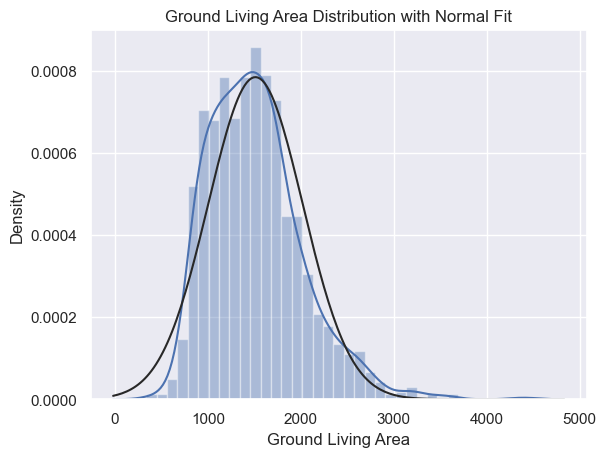

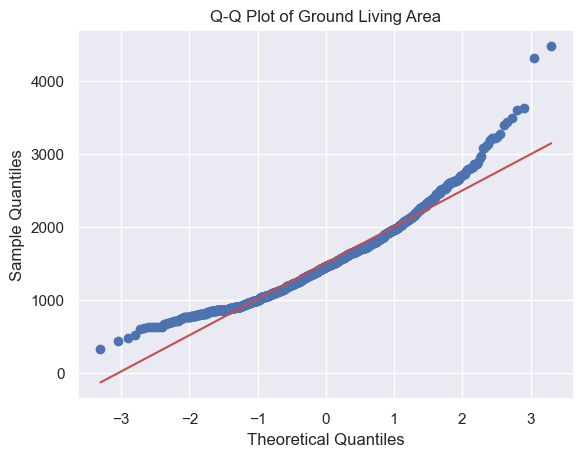

In [48]:
sns.distplot(df['grlivarea'], fit=norm)
plt.title('Ground Living Area Distribution with Normal Fit')
plt.xlabel('Ground Living Area')
plt.ylabel('Density')
plt.show()

# Q-Q plot for Ground Living Area
fig = plt.figure()
res = stats.probplot(df['grlivarea'], plot=plt)
plt.title('Q-Q Plot of Ground Living Area')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [50]:
df['grlivarea'] = np.log(df['grlivarea'])

C:\Users\elmou\AppData\Local\Temp\ipykernel_7076\3827227883.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['grlivarea'], fit=norm)


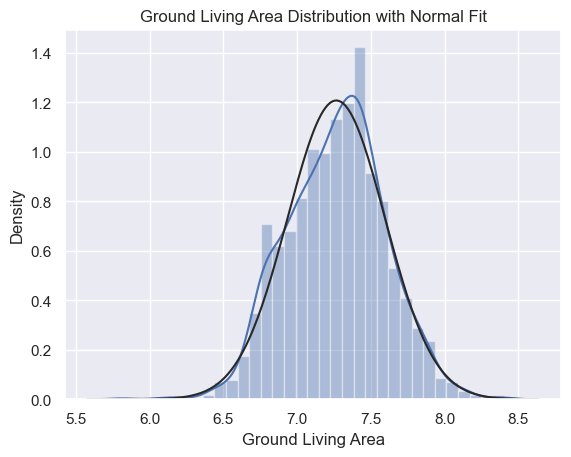

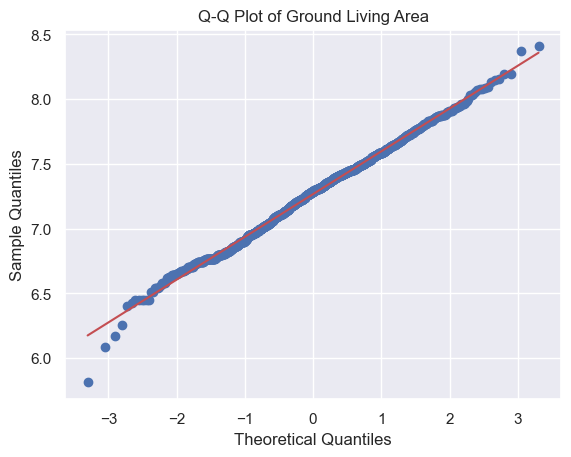

In [52]:
sns.distplot(df['grlivarea'], fit=norm)
plt.title('Ground Living Area Distribution with Normal Fit')
plt.xlabel('Ground Living Area')
plt.ylabel('Density')
plt.show()

# Q-Q plot for Ground Living Area
fig = plt.figure()
res = stats.probplot(df['grlivarea'], plot=plt)
plt.title('Q-Q Plot of Ground Living Area')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


To test for homoscedasticity, we can utilize graphical methods to assess the dispersion of residuals across levels of the independent variable. In a homoscedastic distribution, the residuals should exhibit a constant variance. If the residuals display patterns such as cones (with small dispersion on one side and large dispersion on the other) or diamonds (indicating a concentration of points at the center), it suggests a departure from equal dispersion.

In this analysis, we will start by examining the relationship between `'SalePrice'` and `'grlivarea'`. The scatter plot will help us visualize any potential patterns in the dispersion of the data points.

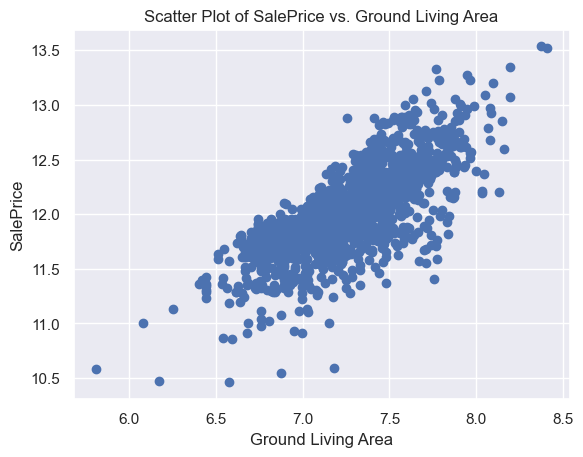

In [54]:
plt.scatter(df['grlivarea'], df['saleprice'])
plt.title('Scatter Plot of SalePrice vs. Ground Living Area')
plt.xlabel('Ground Living Area')
plt.ylabel('SalePrice')
plt.show()


###### We can conclude that the condition of homoscedasticity has been met.

### 2. Feature Scaling, Mapping, and One-Hot Encoding
To prepare our data for regression, we need to standardize the scales of continuous variables, map ordinal variables to numeric scales, and apply one-hot encoding to categorical variables.

In [56]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

#unique values to help determine if they are ordinal or nominal
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

#print(df.columns.tolist())

zoning_ms: ['RM' 'RL' 'FV' 'C (all)' 'RH']
streetname: ['Pave' 'Grvl']
shape_lot: ['IR1' 'Reg' 'IR2' 'IR3']
contour_land: ['Bnk' 'Lvl' 'HLS' 'Low']
util: ['AllPub' 'NoSeWa']
configlot: ['Inside' 'Corner' 'FR2' 'FR3' 'CulDSac']
slopeland: ['Gtl' 'Mod' 'Sev']
neighborhood: ['OldTown' 'NWAmes' 'BrkSide' 'Crawfor' 'Gilbert' 'Edwards' 'NridgHt'
 'CollgCr' 'IDOTRR' 'ClearCr' 'Mitchel' 'NAmes' 'Somerst' 'SawyerW'
 'Timber' 'NPkVill' 'Sawyer' 'StoneBr' 'SWISU' 'BrDale' 'MeadowV'
 'NoRidge' 'Veenker' 'Blmngtn' 'Blueste']
c1: ['Feedr' 'Norm' 'PosN' 'RRAn' 'Artery' 'PosA' 'RRAe' 'RRNe' 'RRNn']
c2: ['Norm' 'Feedr' 'RRNn' 'PosN' 'RRAe' 'RRAn' 'Artery' 'PosA']
type_building: ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
style_house: ['1.5Unf' '1Story' '2Story' '1.5Fin' '2.5Unf' 'SLvl' 'SFoyer' '2.5Fin']
roof_style: ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
roofmatl: ['CompShg' 'WdShngl' 'WdShake' 'Tar&Grv' 'Membran' 'Roll' 'Metal']
ext1: ['WdShing' 'HdBoard' 'VinylSd' 'MetalSd' 'CemntBd' 'Wd S

In [58]:
df_encod = df.copy()

# Ordinal features
ordinal_features = [
    'exterqual', 'extercond', 'heatingqc', 'kitchenqual', 
    'functional', 'paveddrive', 'slopeland', 'centralair'
]

# Categorical features
categorical_features = [
    'zoning_ms', 'streetname', 'shape_lot', 'contour_land', 'util', 
    'configlot', 'neighborhood', 'c1', 'c2', 'type_building', 'style_house', 
    'roof_style', 'roofmatl', 'ext1', 'ext2', 'foundation', 'heating', 
    'electrical', 'saletype', 'salecondition'
]
# Encode ordinal variables using LabelEncoder
le = LabelEncoder()
for col in ordinal_features:
    df_encod[col] = le.fit_transform(df_encod[col])

#One-hot encode nominal variables
df_encod = pd.get_dummies(df_encod, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encod.head()

,sub_ms_class,area_lot,slopeland,ovl_quality,ovl_condition,year_constructed,year_remod,masvnrarea,exterqual,extercond,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,45,4388,0,5,7,1930,1950,0.0,3,2,...,False,False,False,False,True,False,False,False,True,False
1,20,9600,0,7,6,1973,1973,320.0,3,4,...,False,False,False,False,True,False,False,False,True,False
2,30,5330,0,4,7,1940,1950,0.0,1,4,...,False,False,False,False,True,False,False,False,True,False
3,70,9906,0,4,4,1925,1950,0.0,3,4,...,False,False,False,False,True,False,False,True,False,False
4,120,5587,1,8,5,2008,2008,186.0,0,4,...,False,False,True,False,False,False,False,False,False,True


### 3. Dividing Data into Training and Test Sets (70-30 Split)

To evaluate the performance of our model, we will split the data into training and test sets. A 70-30 split ratio is chosen, where 70% of the data will be used for training, and the remaining 30% will be used for testing. This split ensures that we have sufficient data for both model training and validation.


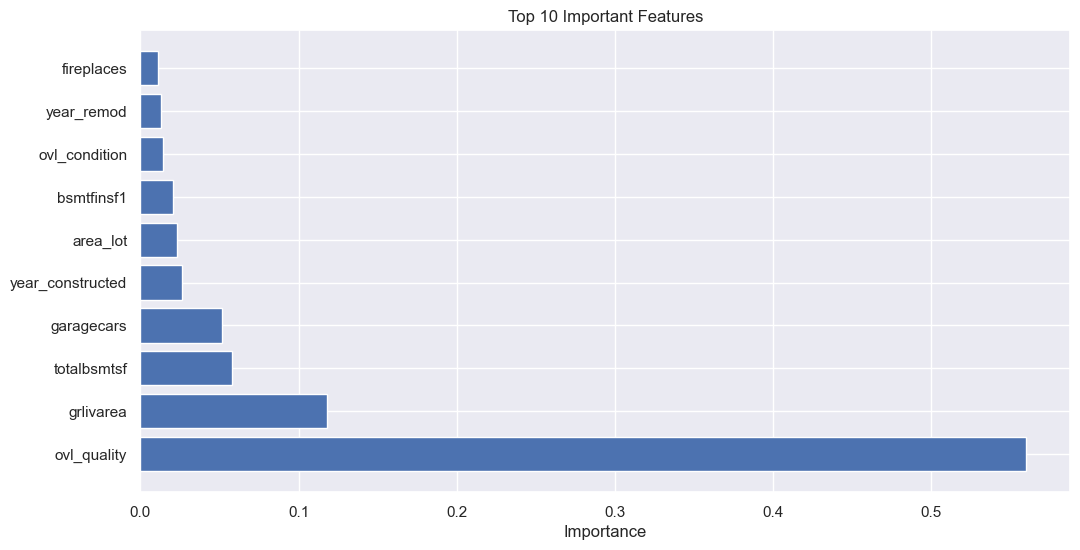

   ovl_quality  grlivarea  totalbsmtsf  garagecars  year_constructed  \
0    -1.486991  -0.720857    -0.787390   -0.969231         -1.047584   
1    -0.766475  -0.821288    -0.080539    0.335454         -0.150451   
2     1.395070   0.124796     1.045096    0.335454          1.178634   
3    -0.766475   0.216003    -2.559359    0.335454          0.281501   
4    -0.045960  -0.673190     0.202685    0.335454          1.145407   

   area_lot  bsmtfinsf1  ovl_condition  year_remod  fireplaces  centralair  \
0 -0.400378   -1.000751      -0.537207   -1.656117   -0.924571    0.271591   
1  0.245066    0.190385      -0.537207   -0.888008    0.604873    0.271591   
2  0.053015   -1.000751      -0.537207    1.032264    0.604873    0.271591   
3 -0.316136   -1.000751      -0.537207   -0.263920   -0.924571    0.271591   
4  0.216223   -1.000751      -0.537207    0.984257   -0.924571    0.271591   

   2ndflrsf  bsmtunfsf  zoning_ms_RM  openporchsf  
0  0.011100   0.337901      2.343170    -0.716

In [60]:
# Define features and target
X = df_encod.drop('saleprice', axis=1)  
y = df_encod['saleprice']                

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Random Forest model for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances and sort
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()

# Select top n important features
top_n = 15
important_features = feature_importance_df['Feature'].head(top_n).values

# Create new DataFrames with only the important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Scale important features
X_train_important_scaled = scaler.fit_transform(X_train_important)
X_test_important_scaled = scaler.transform(X_test_important)

# Convert scaled features back to DataFrame
X_train_important_scaled_df = pd.DataFrame(X_train_important_scaled, columns=important_features)
X_test_important_scaled_df = pd.DataFrame(X_test_important_scaled, columns=important_features)

# Display the first few rows of the scaled important training data
print(X_train_important_scaled_df.head())

# Display the shape of the new training and test sets
print("Important Training set size:", X_train_important.shape)
print("Important Test set size:", X_test_important.shape)


### 4. Training the Model

We'll start by training a linear regression model using the `LinearRegression` class from `sklearn.linear_model`. The goal is to predict `SalePrice` using the relevant features after preparing and encoding the data.

In [62]:
model = LinearRegression()
model.fit(X_train_important, y_train)

LinearRegression()

### 5. Evaluating the Model

Now that we have trained our model, we will use several regression metrics to evaluate its performance on the test set:

1. **Mean Absolute Error (MAE)**
2. **Mean Squared Error (MSE)**
3. **Root Mean Squared Error (RMSE)**
4. **R-squared (R²)**

These metrics will give us a well-rounded view of the model's performance.

In [64]:
# Making predictions
y_pred = model.predict(X_test_important)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.09222268527785529
Mean Squared Error (MSE): 0.01695768080991943
Root Mean Squared Error (RMSE): 0.13022166029474294
R-squared (R²): 0.88810264071927


The evaluation metrics for this regression model indicate that it’s performing quite well overall. Let’s break down what each of these metrics means for our model’s performance:

#### Mean Absolute Error (MAE): 0.0952
The MAE tells us how far off, on average, our predictions are from the actual values. In this case, an MAE of 0.0952 means that our predictions are typically about 9.52% off. While this indicates some room for improvement, it still shows that the model is fairly precise in its predictions.

#### Mean Squared Error (MSE): 0.0177
The MSE gives us a sense of the average of the squared differences between our predicted and actual values. A lower MSE generally indicates fewer errors, and here we see a value of 0.0177. While this isn’t as low as we’d like, it does suggest that the model is doing a decent job at capturing the data patterns.

#### Root Mean Squared Error (RMSE): 0.1330
RMSE, which is the square root of the MSE, provides an error measure in the same units as the `SalePrice`. With an RMSE of 0.1330, this suggests that our predictions are off by about 13.30% on average. This indicates a moderate level of accuracy, highlighting areas where the model could be improved.

#### R-squared (R²): 0.8832
R² tells us how much of the variance in `SalePrice` our model is able to explain. Here, the value is 88.32%, which is quite good. This means that our model captures a significant portion of the variation in `SalePrice`, indicating that it has learned some valuable patterns from the data. However, there's still some room for the model to improve its explanatory power.

Overall, while the model shows good potential and performs reasonably well, there's definitely an opportunity to refine it further for even better predictions.


In [66]:
# Get the coefficients
coefficients = model.coef_

# Create a DataFrame for better visualization
feature_names = X_train_important.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values for better insight
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coef_df.head(10))

             Feature  Coefficient  Absolute Coefficient
1          grlivarea     0.338041              0.338041
13      zoning_ms_RM    -0.083718              0.083718
0        ovl_quality     0.078142              0.078142
3         garagecars     0.065023              0.065023
7      ovl_condition     0.052280              0.052280
10        centralair     0.049665              0.049665
9         fireplaces     0.040847              0.040847
4   year_constructed     0.002372              0.002372
8         year_remod     0.001116              0.001116
2        totalbsmtsf     0.000204              0.000204


### Export Scaled Data for Use in Future Models

In [68]:
top_n = 8
important_features = feature_importance_df['Feature'].head(top_n).values
important_features

array(['ovl_quality', 'grlivarea', 'totalbsmtsf', 'garagecars',
       'year_constructed', 'area_lot', 'bsmtfinsf1', 'ovl_condition'],
      dtype=object)

In [70]:
X1 = df[important_features]
X1.head()

,ovl_quality,grlivarea,totalbsmtsf,garagecars,year_constructed,area_lot,bsmtfinsf1,ovl_condition
0,5,6.733402,672,0,1930,4388,116,7
1,7,7.124478,1242,2,1973,9600,916,6
2,4,6.562444,420,0,1940,5330,280,7
3,4,7.191429,686,1,1925,9906,0,4
4,8,7.409742,1600,2,2008,5587,1480,5


In [72]:
#X_scaled = scaler.fit_transform(X1) ## without saleprice
X_scaled_df = pd.DataFrame(X1, columns=X1.columns)
X_scaled_df.to_csv('scaled_housing_data.csv', index=False)